# Car Price Prediction Project

<b>Submitted By:</b> Krushna Bhutare<br>

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [81]:
df = pd.read_csv("car_price_prediction_.csv")
df.head()

,Car ID,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Price,Model
0,1,Tesla,2016,2.3,Petrol,Manual,114832,New,26613.92,Model X
1,2,BMW,2018,4.4,Electric,Manual,143190,Used,14679.61,5 Series
2,3,Audi,2013,4.5,Electric,Manual,181601,New,44402.61,A4
3,4,Tesla,2011,4.1,Diesel,Automatic,68682,New,86374.33,Model Y
4,5,Ford,2009,2.6,Diesel,Manual,223009,Like New,73577.10,Mustang


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Car ID        2500 non-null   int64  
 1   Brand         2500 non-null   object 
 2   Year          2500 non-null   int64  
 3   Engine Size   2500 non-null   float64
 4   Fuel Type     2500 non-null   object 
 5   Transmission  2500 non-null   object 
 6   Mileage       2500 non-null   int64  
 7   Condition     2500 non-null   object 
 8   Price         2500 non-null   float64
 9   Model         2500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 195.4+ KB


In [83]:
df.describe()

,Car ID,Year,Engine Size,Mileage,Price
count,2500.00000,2500.0000,2500.000000,2500.000000,2500.000000
mean,1250.50000,2011.6268,3.465240,149749.844800,52638.022532
std,721.83216,6.9917,1.432053,87919.952034,27295.833455
min,1.00000,2000.0000,1.000000,15.000000,5011.270000
25%,625.75000,2005.0000,2.200000,71831.500000,28908.485000
50%,1250.50000,2012.0000,3.400000,149085.000000,53485.240000
75%,1875.25000,2018.0000,4.700000,225990.500000,75838.532500
max,2500.00000,2023.0000,6.000000,299967.000000,99982.590000


In [84]:
df.isnull().sum()

Car ID          0
Brand           0
Year            0
Engine Size     0
Fuel Type       0
Transmission    0
Mileage         0
Condition       0
Price           0
Model           0
dtype: int64

In [85]:
df.duplicated().sum()

np.int64(0)

In [86]:
df.drop('Car ID', axis=1, inplace=True)

In [87]:
df.dtypes

Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage           int64
Condition        object
Price           float64
Model            object
dtype: object

In [88]:
df['Mileage'] = df['Mileage'].astype(float)

In [89]:
df.dtypes

Brand            object
Year              int64
Engine Size     float64
Fuel Type        object
Transmission     object
Mileage         float64
Condition        object
Price           float64
Model            object
dtype: object

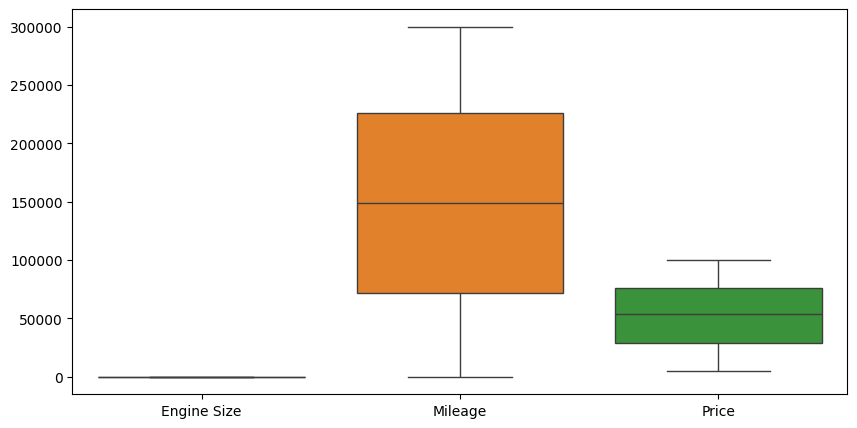

In [90]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Engine Size','Mileage','Price']])
plt.show()

In [91]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         2500 non-null   object 
 1   Year          2500 non-null   int64  
 2   Engine Size   2500 non-null   float64
 3   Fuel Type     2500 non-null   object 
 4   Transmission  2500 non-null   object 
 5   Mileage       2500 non-null   float64
 6   Condition     2500 non-null   object 
 7   Price         2500 non-null   float64
 8   Model         2500 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 175.9+ KB


,Year,Engine Size,Mileage,Price
count,2500.0000,2500.000000,2500.000000,2500.000000
mean,2011.6268,3.465240,149749.844800,52638.022532
std,6.9917,1.432053,87919.952034,27295.833455
min,2000.0000,1.000000,15.000000,5011.270000
25%,2005.0000,2.200000,71831.500000,28908.485000
50%,2012.0000,3.400000,149085.000000,53485.240000
75%,2018.0000,4.700000,225990.500000,75838.532500
max,2023.0000,6.000000,299967.000000,99982.590000


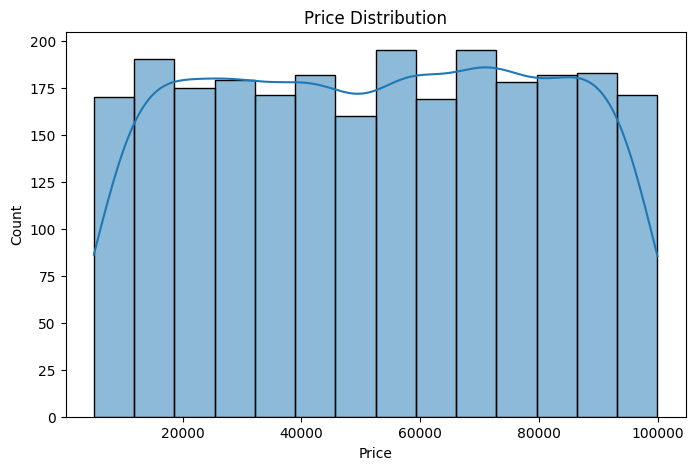

In [92]:
plt.figure(figsize=(8,5))
sns.histplot(df['Price'], kde=True)
plt.title("Price Distribution")
plt.show()

The price distribution appears nearly uniform without heavy skewness.
<br>The values are spread evenly between 10,000 and 100,000.
<br>No strong outliers are visible from the histogram.
<br>This distribution is suitable for regression modeling.

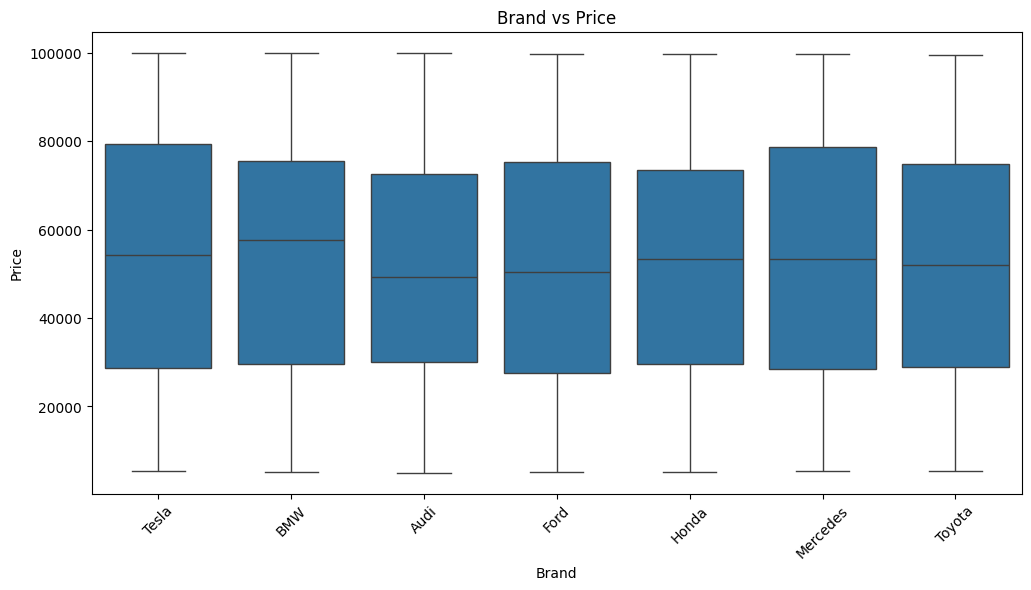

In [93]:
#Brand vs Price
plt.figure(figsize=(12,6))
sns.boxplot(x='Brand', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Brand vs Price")
plt.show()

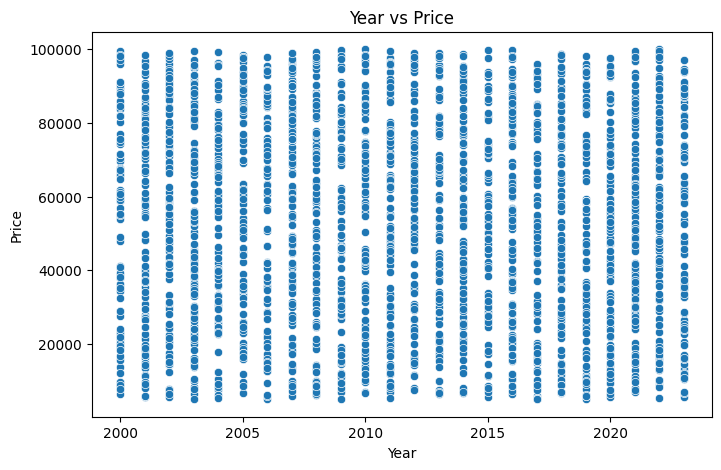

In [94]:
#Year vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Year', y='Price', data=df)
plt.title("Year vs Price")
plt.show()

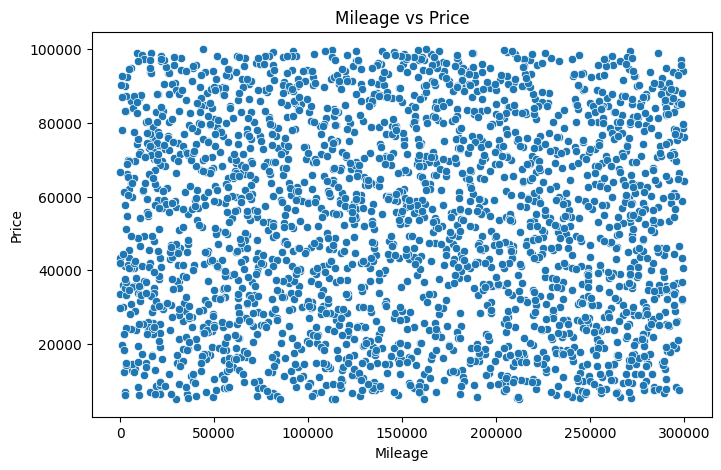

In [95]:
#Mileage vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Mileage vs Price")
plt.show()

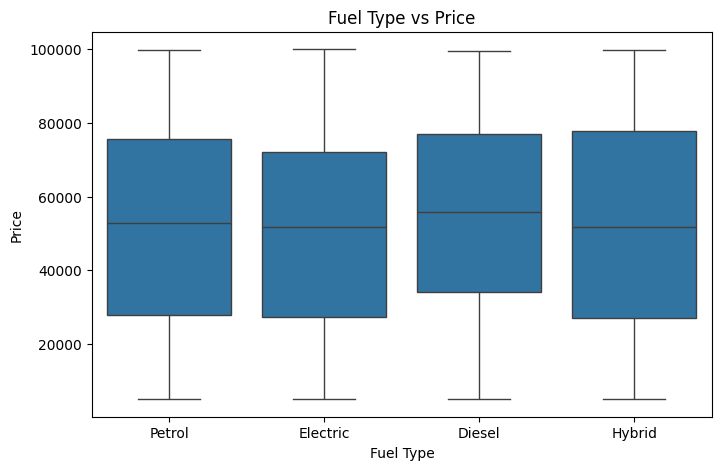

In [96]:
#Fuel Type vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Fuel Type', y='Price', data=df)
plt.title("Fuel Type vs Price")
plt.show()

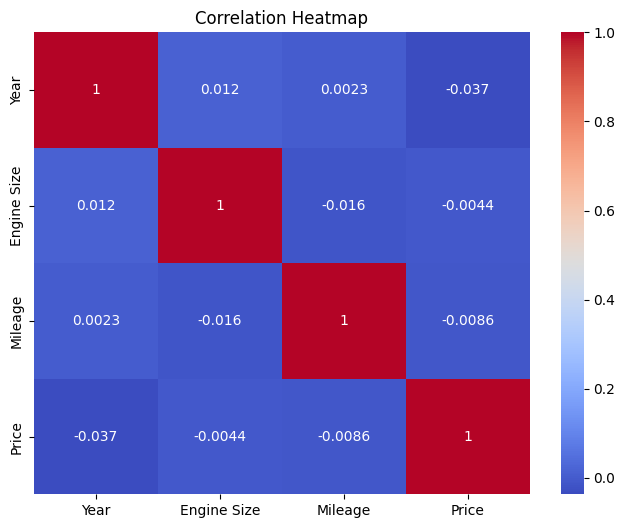

In [97]:
#Correlation Heatmap
numeric_df = df.select_dtypes(include=np.number)
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

1. Most features show very weak correlation with Price.
2. Correlation values are close to zero.
3. No strong linear relationship is observed.
4. Dataset appears to have randomly distributed price values.

In [98]:
X = df.drop("Price", axis=1)
y = df["Price"]
X.head()

,Brand,Year,Engine Size,Fuel Type,Transmission,Mileage,Condition,Model
0,Tesla,2016,2.3,Petrol,Manual,114832.0,New,Model X
1,BMW,2018,4.4,Electric,Manual,143190.0,Used,5 Series
2,Audi,2013,4.5,Electric,Manual,181601.0,New,A4
3,Tesla,2011,4.1,Diesel,Automatic,68682.0,New,Model Y
4,Ford,2009,2.6,Diesel,Manual,223009.0,Like New,Mustang


In [99]:
X.select_dtypes(include='object').columns

Index(['Brand', 'Fuel Type', 'Transmission', 'Condition', 'Model'], dtype='object')

In [100]:
X = pd.get_dummies(X, drop_first=True)
X.head()

,Year,Engine Size,Mileage,Brand_BMW,Brand_Ford,Brand_Honda,Brand_Mercedes,Brand_Tesla,Brand_Toyota,Fuel Type_Electric,...,Model_Model S,Model_Model X,Model_Model Y,Model_Mustang,Model_Prius,Model_Q5,Model_Q7,Model_RAV4,Model_X3,Model_X5
0,2016,2.3,114832.0,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,False,False,False
1,2018,4.4,143190.0,True,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2013,4.5,181601.0,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,2011,4.1,68682.0,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2009,2.6,223009.0,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [101]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (2000, 42)
Testing Shape: (500, 42)


## 1.Developing a regression based ML model

#### <b>Linear Regression Model

In [103]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [104]:
y_pred_lr = lr_model.predict(X_test)

In [105]:
print("Linear Regression Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("R2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression Performance
MAE: 23877.14311881307
MSE: 772529400.9039493
RMSE: 27794.413123934624
R2 Score: -0.019768995768102426


#### <b>RandomForestRegressor

In [106]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [107]:
y_pred_rf = rf_model.predict(X_test)

In [108]:
print("Random Forest Performance")
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("R2 Score:", r2_score(y_test, y_pred_rf))

Random Forest Performance
MAE: 24551.124572000004
MSE: 809868097.4059958
RMSE: 28458.18155480065
R2 Score: -0.06905753415981652


#### <b>Comparing both models

In [109]:
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear Regression R2: -0.019768995768102426
Random Forest R2: -0.06905753415981652


<b>I got knowledge from above models :-</b><br>
The R2 score for both Linear Regression and Random Forest is negative.
<br>This indicates that the models perform worse than predicting the mean price.
<br>EDA analysis also showed very weak correlation between features and price.
<br>Therefore, the dataset does not contain strong predictive relationships.

## <b>2. To Identify key features influsing car prices :

In [110]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance.head(10)

,Feature,Importance
2,Mileage,0.250213
1,Engine Size,0.177850
0,Year,0.140450
12,Transmission_Manual,0.025850
13,Condition_New,0.022880
11,Fuel Type_Petrol,0.022678
14,Condition_Used,0.022648
10,Fuel Type_Hybrid,0.021845
9,Fuel Type_Electric,0.020798
3,Brand_BMW,0.015727


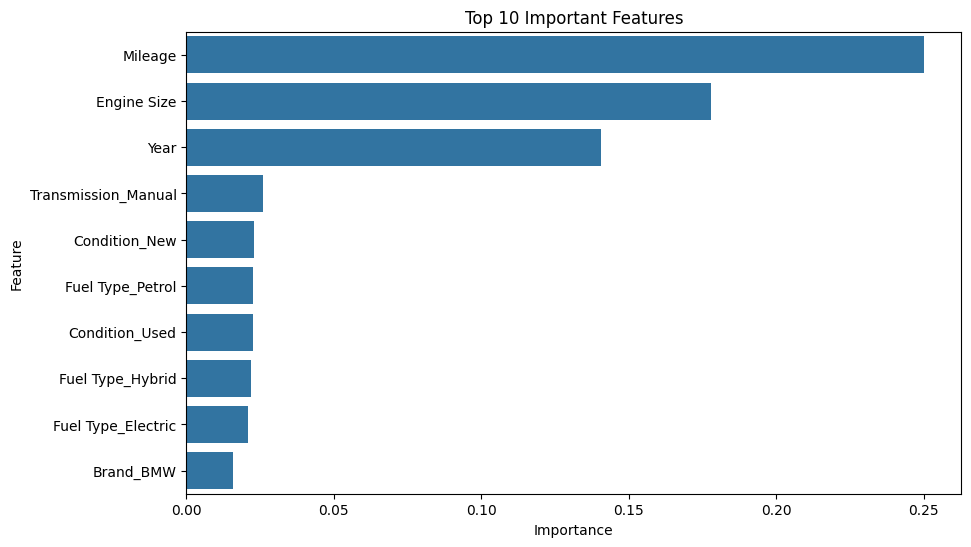

In [111]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(10))
plt.title("Top 10 Important Features")
plt.show()

As in above graph, Top features were Mileage followed by Engine Size, Year, Transmission, Condition.<br>But overall influence was weak.

## <b>3. Actionable insights:

#### a) Insights for Car Sellers :-

<b>1. Focus on Maintaining Low Mileage</b><br>
Feature importance analysis showed that mileage had relatively higher influence on price. Sellers should maintain vehicles properly and avoid excessive usage to preserve resale value.<br>
<b>2. Improve Vehicle Condition Before Selling</b><br>
Cars in better condition (New or Like New) tend to have slightly better price positioning. Proper servicing, cleaning, and maintenance can increase buyer confidence.<br>
<b>3. Highlight Engine Specifications Clearly</b><br>
Engine size showed moderate importance in price prediction. Sellers should mention engine capacity and performance details clearly in listings to justify pricing.

#### b) Insights for Car Buyers :-

<b>1. Compare Vehicles Based on Specifications, Not Just Brand</b><br>
Brand did not show strong influence on price in this dataset. Buyers should evaluate engine size, mileage, and condition rather than relying only on brand perception.<br>
<b>2. Pay Attention to Mileage</b><br>
Since mileage had relatively higher importance, buyers should consider lower-mileage vehicles for better long-term value.<br>
<b>3. Do Not Assume Newer Cars Are Always Expensive</b><br>
The year of manufacture showed weak correlation with price. Buyers should assess overall vehicle condition and maintenance history.

#### c) Insights for Car Dealers :-

<b>1. Adopt Data-Driven Pricing Strategies</b><br>
Dealers can use machine learning models to estimate base prices and adjust based on market demand and additional features.<br>
<b>2. Collect More Detailed Market Data</b><br>
The dataset showed weak predictive relationships. Dealers should track additional factors such as accident history, ownership count, and service records to improve pricing accuracy.<br>
<b>3. Highlight Key Influential Features in Marketing</b><br>
Since mileage and engine size showed relatively higher importance, these features should be emphasized in advertisements and promotions.

## Retrained the Random Forest Model :-
Retrained the Random Forest Model using complete dataset using all availble data after evaluation, to final prediction system.

In [112]:
# Train final model on full scaled dataset
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_model.fit(X_scaled, y)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",1.0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsample

In [113]:
def predict_price(input_data):
    input_df = pd.DataFrame([input_data])
    input_df = pd.get_dummies(input_df)
    input_df = input_df.reindex(columns=X.columns, fill_value=0)
    input_scaled = scaler.transform(input_df)
    prediction = final_model.predict(input_scaled)
    return prediction[0]

In [114]:
sample_car = {
    'Year': 2020,
    'Engine Size': 2.0,
    'Mileage': 30000,
    'Brand': 'Toyota',
    'Fuel Type': 'Petrol',
    'Transmission': 'Automatic',
    'Condition': 'Good',
    'Model': 'Corolla'
}
predicted_price = predict_price(sample_car)
print("Predicted Car Price:", predicted_price)

Predicted Car Price: 51360.44919999999


## 4. Creating a user-friendly

Use app.py file in same folder.

The dataset showed weak correlation between condition and price. Therefore, the model prediction reflects the underlying data distribution rather than real-world pricing logic.